In [2]:
#This is for the Titanic competition


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [4]:
train_data = pd.read_csv("data/train.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,age_bin,SibSp,Parch,Ticket,Fare,Cabin,cabin_code,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,less than 25,1,0,A/5 21171,7.2500,NaN,none,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,less thank 40,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,less than 30,0,0,STON/O2. 3101282,7.9250,NaN,none,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,less thank 40,1,0,113803,53.1000,C123,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,less thank 40,0,0,373450,8.0500,NaN,none,S


In [6]:
test_data = pd.read_csv("data/test.csv")

In [7]:
test_data.head()
print(len(test_data))

418


In [8]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
#.77511

Your submission was saved!


In [9]:
model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)
#.77033

In [10]:
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")


Your submission was saved!


In [11]:
features = ["Age", "Sex", "Pclass"]
avg_age = train_data["Age"].mean()
print(avg_age)

29.69911764705882


In [12]:
#Lets just look at age and gender.
X = pd.get_dummies(train_data[features])
X = X.fillna(avg_age)
print(X.head)
X_test = pd.get_dummies(test_data[features])
X_test = X_test.fillna(avg_age)

<bound method NDFrame.head of            Age  Pclass  Sex_female  Sex_male
0    22.000000       3           0         1
1    38.000000       1           1         0
2    26.000000       3           1         0
3    35.000000       1           1         0
4    35.000000       3           0         1
..         ...     ...         ...       ...
886  27.000000       2           0         1
887  19.000000       1           1         0
888  29.699118       3           1         0
889  26.000000       1           0         1
890  32.000000       3           0         1

[891 rows x 4 columns]>


In [13]:
model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)

In [14]:
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


In [15]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

avg_age = train_data["Age"].mean()
X = X.fillna(avg_age)
X_test = X_test.fillna(avg_age)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
#.77511

model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)
#.77033

Your submission was saved!


In [16]:
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


In [17]:
#Now we are going to feature engineer the data a bit.


In [18]:
train_data["age_bin"] = ""

In [19]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age age_bin  \
0                              Braund, Mr. Owen Harris    male  22.0           
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0           
2                               Heikkinen, Miss. Laina  female  26.0           
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0           
4                             Allen, Mr. William Henry    male  35.0           
..                               

In [20]:
train_data['Age'] = np.where((train_data.Age == 'nan'), 'unknown', train_data.Age)
train_data['Age'] = np.where((float(train_data.Age) < 5 ), 'Less than 5', train_data.Age)


D:\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


TypeError: cannot convert the series to <class 'float'>

In [21]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age age_bin  \
0                              Braund, Mr. Owen Harris    male  22.0           
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0           
2                               Heikkinen, Miss. Laina  female  26.0           
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0           
4                             Allen, Mr. William Henry    male  35.0           
..                               

In [22]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

avg_age = train_data["Age"].mean()
X = X.fillna(avg_age)
X_test = X_test.fillna(avg_age)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
#.77511

model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)
#.77033

TypeError: Could not convert 22.038.026.035.035.0nan54.02.027.014.04.058.020.039.014.055.02.0nan31.0nan35.034.015.028.08.038.0nan19.0nannan40.0nannan66.028.042.0nan21.018.014.040.027.0nan3.019.0nannannannan18.07.021.049.029.065.0nan21.028.55.011.022.038.045.04.0nannan29.019.017.026.032.016.021.026.032.025.0nannan0.8330.022.029.0nan28.017.033.016.0nan23.024.029.020.046.026.059.0nan71.023.034.034.028.0nan21.033.037.028.021.0nan38.0nan47.014.522.020.017.021.070.529.024.02.021.0nan32.532.554.012.0nan24.0nan45.033.020.047.029.025.023.019.037.016.024.0nan22.024.019.018.019.027.09.036.542.051.022.055.540.5nan51.016.030.0nannan44.040.026.017.01.09.0nan45.0nan28.061.04.01.021.056.018.0nan50.030.036.0nannan9.01.04.0nannan45.040.036.032.019.019.03.044.058.0nan42.0nan24.028.0nan34.045.518.02.032.026.016.040.024.035.022.030.0nan31.027.042.032.030.016.027.051.0nan38.022.019.020.518.0nan35.029.059.05.024.0nan44.08.019.033.0nannan29.022.030.044.025.024.037.054.0nan29.062.030.041.029.0nan30.035.050.0nan3.052.040.0nan36.016.025.058.035.0nan25.041.037.0nan63.045.0nan7.035.065.028.016.019.0nan33.030.022.042.022.026.019.036.024.024.0nan23.52.0nan50.0nannan19.0nannan0.92nan17.030.030.024.018.026.028.043.026.024.054.031.040.022.027.030.022.0nan36.061.036.031.016.0nan45.538.016.0nannan29.041.045.045.02.024.028.025.036.024.040.0nan3.042.023.0nan15.025.0nan28.022.038.0nannan40.029.045.035.0nan30.060.0nannan24.025.018.019.022.03.0nan22.027.020.019.042.01.032.035.0nan18.01.036.0nan17.036.021.028.023.024.022.031.046.023.028.039.026.021.028.020.034.051.03.021.0nannannan33.0nan44.0nan34.018.030.010.0nan21.029.028.018.0nan28.019.0nan32.028.0nan42.017.050.014.021.024.064.031.045.020.025.028.0nan4.013.034.05.052.036.0nan30.049.0nan29.065.0nan50.0nan48.034.047.048.0nan38.0nan56.0nan0.75nan38.033.023.022.0nan34.029.022.02.09.0nan50.063.025.0nan35.058.030.09.0nan21.055.071.021.0nan54.0nan25.024.017.021.0nan37.016.018.033.0nan28.026.029.0nan36.054.024.047.034.0nan36.032.030.022.0nan44.0nan40.550.0nan39.023.02.0nan17.0nan30.07.045.030.0nan22.036.09.011.032.050.064.019.0nan33.08.017.027.0nan22.022.062.048.0nan39.036.0nan40.028.0nannan24.019.029.0nan32.062.053.036.0nan16.019.034.039.0nan32.025.039.054.036.0nan18.047.060.022.0nan35.052.047.0nan37.036.0nan49.0nan49.024.0nannan44.035.036.030.027.022.040.039.0nannannan35.024.034.026.04.026.027.042.020.021.021.061.057.021.026.0nan80.051.032.0nan9.028.032.031.041.0nan20.024.02.0nan0.7548.019.056.0nan23.0nan18.021.0nan18.024.0nan32.023.058.050.040.047.036.020.032.025.0nan43.0nan40.031.070.031.0nan18.024.518.043.036.0nan27.020.014.060.025.014.019.018.015.031.04.0nan25.060.052.044.0nan49.042.018.035.018.025.026.039.045.042.022.0nan24.0nan48.029.052.019.038.027.0nan33.06.017.034.050.027.020.030.0nan25.025.029.011.0nan23.023.028.548.035.0nannannan36.021.024.031.070.016.030.019.031.04.06.033.023.048.00.6728.018.034.033.0nan41.020.036.016.051.0nan30.5nan32.024.048.057.0nan54.018.0nan5.0nan43.013.017.029.0nan25.025.018.08.01.046.0nan16.0nannan25.039.049.031.030.030.034.031.011.00.4227.031.039.018.039.033.026.039.035.06.030.5nan23.031.043.010.052.027.038.027.02.0nannan1.0nan62.015.00.83nan23.018.039.021.0nan32.0nan20.016.030.034.517.042.0nan35.028.0nan4.074.09.016.044.018.045.051.024.0nan41.021.048.0nan24.042.027.031.0nan4.026.047.033.047.028.015.020.019.0nan56.025.033.022.028.025.039.027.019.0nan26.032.0 to numeric

In [23]:
from sklearn import tree
y = train_data["Survived"]
features = ["Pclass", "Sex", "age_bin", "SibSp", "Parch", "Fare", "cabin_code", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = tree.DecisionTreeClassifier()
model.fit(X,y)
predictions=model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [29]:
from sklearn import tree
y = train_data["Survived"]
features = ["Pclass", "Sex", "age_bin", "SibSp", "Parch", "Fare", "cabin_code", "Embarked"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X, X_test = X.align(X_test, join='left', axis=1)

X_test['Fare'] = X_test['Fare'].fillna(value=10)
X_test['age_bin_less than 75'] = X_test['age_bin_less than 75'].fillna(value=0)
X_test['age_bin_less than 85'] = X_test['age_bin_less than 85'].fillna(value=0)
X_test['cabin_code_T'] = X_test['cabin_code_T'].fillna(value=0)

#display(X_test.isnull().any())

model = tree.DecisionTreeClassifier()
model.fit(X,y)
predictions=model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

<bound method NDFrame.head of      Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  age_bin_  \
0         3      1      0   7.2500           0         1         1   
1         1      1      0  71.2833           1         0         1   
2         3      0      0   7.9250           1         0         1   
3         1      1      0  53.1000           1         0         1   
4         3      0      0   8.0500           0         1         1   
..      ...    ...    ...      ...         ...       ...       ...   
886       2      0      0  13.0000           0         1         1   
887       1      0      0  30.0000           1         0         1   
888       3      1      2  23.4500           1         0         1   
889       1      0      0  30.0000           0         1         1   
890       3      0      0   7.7500           0         1         1   

     cabin_code_A  cabin_code_B  cabin_code_C  cabin_code_D  cabin_code_E  \
0               0             0             0       

KeyError: 'age_bin_less than 75'

[Text(193.05620404411766, 211.4, 'X[4] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(109.19806985294119, 199.32, 'X[15] <= 0.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(41.37132352941177, 187.24, 'X[3] <= 7.9\ngini = 0.487\nsamples = 107\nvalue = [62, 45]'),
 Text(39.18308823529412, 175.16, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(43.559558823529414, 175.16, 'X[3] <= 26.469\ngini = 0.496\nsamples = 99\nvalue = [54, 45]'),
 Text(22.429411764705886, 163.07999999999998, 'X[3] <= 26.144\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(20.241176470588236, 151.0, 'X[0] <= 1.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(18.05294117647059, 138.92000000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(22.429411764705886, 138.92000000000002, 'X[18] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(20.241176470588236, 126.84, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(24.617647058823533, 126.84, 'X[2] <= 1.5\ngini = 0

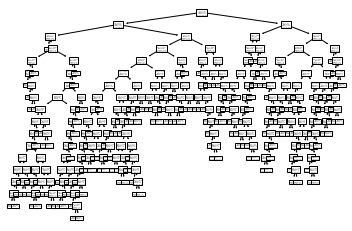

In [25]:
tree.plot_tree(model.fit(X,y))

In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# class labels
labels = train_data.feature_names

# print dataset description
print(train_data.DESCR)

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

AttributeError: 'DataFrame' object has no attribute 'feature_names'